# Validity of using prescription records to identify patient comorbidities
## Analysis of Type 1 diabetes

**ReadMe:**
- This is a script used in the analysis for Schnier et al., 2025: Validity of using prescription records to classify disease – a record linkage study using routinely collected electronic health records from the UK.
- The underlying data set has been created using the Optimum Patient Care Research Database (https://opcrd.optimumpatientcare.org/). The authors do not have permission to give the public access to the study dataset; researchers may request access to OPCRD for their own purposes. 
 - All code is run in StataSE 18. 


**Set up:**
|Var|Input|
| --- | --- | 
|population|425,000|
|diagnostic codes|OpenCodelist (Snomed) and HDRUK (read)|
|drug codes|bnf 06.01|
|sql date|13.03.2025|
|sql code|T1diabetesselection20250313.sql| 

In [1]:
    clear all

### Import from SQL server and data wrangling

In [2]:
odbc load, exec("select * from [t1diabetes_425000_20250313]") dsn("sqlserverconnect")

In [3]:
generate test=0 if missing(drug_dt)
replace test=1 if ! missing(drug_dt)  

generate diag=0 if missing(diag_dt)
replace diag=1 if ! missing(diag_dt)  

gen start_year=year(fu_start_dt)


egen agecat = cut(age), at(16,30,70,120)
label def agecat_lab 16 "Young" 30 "0Middle" 70 "Elderly" 120 "weird"
label values agecat agecat_lab


egen yearcat = cut(start_year), at(2004,2010,2016,2025)
label def yearcat_lab 2004 "2004-2009" 2010 "2010-2015" 2016 "2016-2020" 
label values yearcat yearcat_lab

egen imdcat = cut(imd_decile), at(0,4,8,11)
label def imdcat_lab 0 "1-3" 4 "4-7" 8 "8-10" 
label values imdcat imdcat_lab


replace bnf_code = "Insulins" if bnf_code== "060101"
replace bnf_code = "Insulin syringes" if bnf_code== "210109"
replace bnf_code = "Antidiabetec drugs" if bnf_code== "060102"
replace bnf_code = "Hypoglycaemia" if bnf_code== "060104"
replace bnf_code = "Diagnostic and monitoring devices" if bnf_code== "060106"
replace bnf_code = "Other/unknown" if (missing(bnf_code) & ! missing(drug_dt))



replace ethnicity="0white" if ethnicity=="1"
replace ethnicity="Other" if ethnicity=="2"
replace ethnicity="Other" if ethnicity=="3"
replace ethnicity="Other" if ethnicity=="4"
replace ethnicity="Other" if ethnicity=="5"
replace ethnicity="Missing" if ethnicity=="99"




encode bnf_code, generate(bnf_code_values) 
encode description, generate(description_values)
encode ethnicity, generate(ethnicity_values) 

gen diag_neg=diag==0
gen diag_pos=diag==1
encode region_name, generate(region) label(regionlbl)
encode ethnicity, generate(ethnic)

(13,614 missing values generated)
(13,614 real changes made)
(1,546 missing values generated)
(1,546 real changes made)
(2,589 missing values generated)
variable bnf_code was str6 now str8
(5,677 real changes made)
variable bnf_code was str8 now str16
(7,208 real changes made)
(0 real changes made)
(0 real changes made)
variable bnf_code was str16 now str33
(3 real changes made)
(726 real changes made)
variable ethnicity was str2 now str6
(257,994 real changes made)
(3,763 real changes made)
(23,915 real changes made)
(7,431 real changes made)
(8,765 real changes made)
variable ethnicity was str6 now str7
(123,152 real changes made)


(bin=19, start=16, width=5)


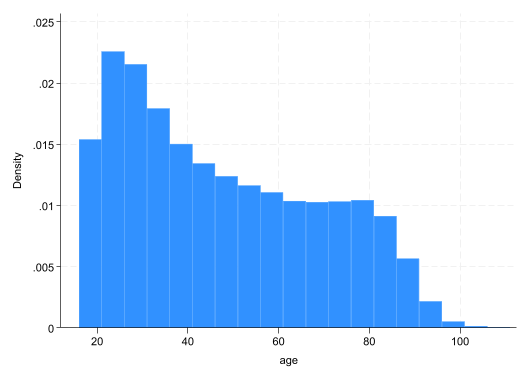

In [4]:
histogram age, width(5)


This table holds one randomly selected diagnostic code found during the observation period. The table is truncated to only include diagnostic codes with a count of 10 or more.

In [5]:
set linesize 132
groups description , select(f >= 10) ord(h) table 


  +----------------------------------------------------------------------------------------+
  |                                                  description   Freq.   Percent     %<= |
  |----------------------------------------------------------------------------------------|
  |                                     Diabetes mellitus type 1     560     36.22   36.22 |
  |                                     Type I diabetes mellitus     501     32.41   68.63 |
  |                               Type I diabetic dietary review     224     14.49   83.12 |
  |                                       Diabetes type 1 review      99      6.40   89.52 |
  |                          History of diabetes mellitus type 1      24      1.55   91.07 |
  |----------------------------------------------------------------------------------------|
  |                                H/O: diabetes mellitus type 1      21      1.36   92.43 |
  |   Referral to type I diabetes structured education programme     

These tables holds one randomly selected prescrption during the observation period. The table is truncated to only include codes with a count of 10 or more.


In [6]:
set linesize 132
groups bnf_code , select(f >= 10) ord(h) table 


  +--------------------------------------------+
  |         bnf_code   Freq.   Percent     %<= |
  |--------------------------------------------|
  | Insulin syringes    7208     52.95   52.95 |
  |         Insulins    5677     41.70   94.65 |
  |    Other/unknown     726      5.33   99.98 |
  +--------------------------------------------+


### Results
#### Overall

In [7]:
diagt diag test


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,451         95 |     1,546 
    Normal |    12,163    411,311 |   423,474 
-----------+----------------------+----------
     Total |    13,614    411,406 |   425,020 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.4%      0.3%       0.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     93.9%     92.5%     95.0%
Specificity                      Pr(-|N)     97.1%     97.1%     97.2%
ROC area               (Sens. + Spec.)/2      0.95      0.95      0.96 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     32.68     31.

#### Males

In [8]:
diagt diag test if sex==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       820         50 |       870 
    Normal |     6,527    200,899 |   207,426 
-----------+----------------------+----------
     Total |     7,347    200,949 |   208,296 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.4%      0.4%       0.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     94.3%     92.5%     95.7%
Specificity                      Pr(-|N)     96.9%     96.8%     96.9%
ROC area               (Sens. + Spec.)/2      0.96      0.95      0.96 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     29.95     29.

#### Females

In [9]:
diagt diag test if sex==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       631         45 |       676 
    Normal |     5,636    210,403 |   216,039 
-----------+----------------------+----------
     Total |     6,267    210,448 |   216,715 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.3%      0.3%       0.3%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     93.3%     91.2%     95.1%
Specificity                      Pr(-|N)     97.4%     97.3%     97.5%
ROC area               (Sens. + Spec.)/2      0.95      0.94      0.96 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     35.78     34.

#### Age
*16-30*

In [10]:
diagt diag test if agecat==16


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       333         10 |       343 
    Normal |       614    116,721 |   117,335 
-----------+----------------------+----------
     Total |       947    116,731 |   117,678 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.3%      0.3%       0.3%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     97.1%     94.7%     98.6%
Specificity                      Pr(-|N)     99.5%     99.4%     99.5%
ROC area               (Sens. + Spec.)/2      0.98      0.97      0.99 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    185.53    171.

*30-69*

In [11]:
diagt diag test if agecat==30


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       865         45 |       910 
    Normal |     6,662    213,834 |   220,496 
-----------+----------------------+----------
     Total |     7,527    213,879 |   221,406 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.4%      0.4%       0.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     95.1%     93.4%     96.4%
Specificity                      Pr(-|N)     97.0%     96.9%     97.0%
ROC area               (Sens. + Spec.)/2      0.96      0.95      0.97 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     31.46     30.

*>69*

In [12]:
diagt diag test if agecat==70


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       253         40 |       293 
    Normal |     4,887     80,756 |    85,643 
-----------+----------------------+----------
     Total |     5,140     80,796 |    85,936 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.3%      0.3%       0.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     86.3%     81.9%     90.1%
Specificity                      Pr(-|N)     94.3%     94.1%     94.4%
ROC area               (Sens. + Spec.)/2      0.90      0.88      0.92 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     15.13     14.

#### Year at start of oberservation period 
*2004-2009*

In [13]:
diagt diag test if yearcat==2004


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       403         26 |       429 
    Normal |     4,402    145,175 |   149,577 
-----------+----------------------+----------
     Total |     4,805    145,201 |   150,006 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.3%      0.3%       0.3%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     93.9%     91.2%     96.0%
Specificity                      Pr(-|N)     97.1%     97.0%     97.1%
ROC area               (Sens. + Spec.)/2      0.95      0.94      0.97 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     31.92     30.

*2010-2015*

In [14]:
diagt diag test if yearcat==2010


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       552         36 |       588 
    Normal |     4,140    145,278 |   149,418 
-----------+----------------------+----------
     Total |     4,692    145,314 |   150,006 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.4%      0.4%       0.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     93.9%     91.6%     95.7%
Specificity                      Pr(-|N)     97.2%     97.1%     97.3%
ROC area               (Sens. + Spec.)/2      0.96      0.95      0.97 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     33.88     32.

*2016-2020*

In [15]:
diagt diag test if yearcat==2016


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       496         33 |       529 
    Normal |     3,621    120,858 |   124,479 
-----------+----------------------+----------
     Total |     4,117    120,891 |   125,008 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.4%      0.4%       0.5%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     93.8%     91.4%     95.7%
Specificity                      Pr(-|N)     97.1%     97.0%     97.2%
ROC area               (Sens. + Spec.)/2      0.95      0.94      0.96 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     32.23     31.

#### IMD of practice
*1-3*

In [16]:
diagt diag test if imdcat==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       511         51 |       562 
    Normal |     5,129    148,867 |   153,996 
-----------+----------------------+----------
     Total |     5,640    148,918 |   154,558 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.4%      0.3%       0.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     90.9%     88.2%     93.2%
Specificity                      Pr(-|N)     96.7%     96.6%     96.8%
ROC area               (Sens. + Spec.)/2      0.94      0.93      0.95 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     27.30     26.

*4-7*

In [17]:
diagt diag test if imdcat==4


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       534         28 |       562 
    Normal |     4,044    138,449 |   142,493 
-----------+----------------------+----------
     Total |     4,578    138,477 |   143,055 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.4%      0.4%       0.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     95.0%     92.9%     96.7%
Specificity                      Pr(-|N)     97.2%     97.1%     97.2%
ROC area               (Sens. + Spec.)/2      0.96      0.95      0.97 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     33.48     32.

*8-10*

In [18]:
diagt diag test if imdcat==8


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       401         16 |       417 
    Normal |     2,985    121,416 |   124,401 
-----------+----------------------+----------
     Total |     3,386    121,432 |   124,818 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.3%      0.3%       0.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     96.2%     93.8%     97.8%
Specificity                      Pr(-|N)     97.6%     97.5%     97.7%
ROC area               (Sens. + Spec.)/2      0.97      0.96      0.98 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     40.08     38.

#### Commissioning Regions
EAST OF ENGLAND

In [19]:
diagt diag test if regexm(region_name,"ENGLAND")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       359         32 |       391 
    Normal |     2,951     86,305 |    89,256 
-----------+----------------------+----------
     Total |     3,310     86,337 |    89,647 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.4%      0.4%       0.5%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     91.8%     88.6%     94.3%
Specificity                      Pr(-|N)     96.7%     96.6%     96.8%
ROC area               (Sens. + Spec.)/2      0.94      0.93      0.96 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     27.77     26.

London

In [20]:
diagt diag test if regexm(region_name,"LONDON")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |        45          1 |        46 
    Normal |       202     16,477 |    16,679 
-----------+----------------------+----------
     Total |       247     16,478 |    16,725 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.3%      0.2%       0.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     97.8%     88.5%     99.9%
Specificity                      Pr(-|N)     98.8%     98.6%     98.9%
ROC area               (Sens. + Spec.)/2      0.98      0.96      1.00 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     80.77     69.

Midlands

In [21]:
diagt diag test if regexm(region_name,"MID")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       195         12 |       207 
    Normal |     1,481     44,857 |    46,338 
-----------+----------------------+----------
     Total |     1,676     44,869 |    46,545 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.4%      0.4%       0.5%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     94.2%     90.1%     97.0%
Specificity                      Pr(-|N)     96.8%     96.6%     97.0%
ROC area               (Sens. + Spec.)/2      0.96      0.94      0.97 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     29.47     27.

Yorkshire

In [22]:
diagt diag test if regexm(region_name,"YORK")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       238         25 |       263 
    Normal |     3,189     82,663 |    85,852 
-----------+----------------------+----------
     Total |     3,427     82,688 |    86,115 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.3%      0.3%       0.3%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     90.5%     86.3%     93.8%
Specificity                      Pr(-|N)     96.3%     96.2%     96.4%
ROC area               (Sens. + Spec.)/2      0.93      0.92      0.95 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     24.36     23.

North West

In [23]:
diagt diag test if regexm(region_name,"NORTH")==1 & regexm(region_name,"WEST")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       167          7 |       174 
    Normal |       770     46,651 |    47,421 
-----------+----------------------+----------
     Total |       937     46,658 |    47,595 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.4%      0.3%       0.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     96.0%     91.9%     98.4%
Specificity                      Pr(-|N)     98.4%     98.3%     98.5%
ROC area               (Sens. + Spec.)/2      0.97      0.96      0.99 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     59.11     54.

South East

In [24]:
diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"EAST")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       277          7 |       284 
    Normal |     2,130     88,071 |    90,201 
-----------+----------------------+----------
     Total |     2,407     88,078 |    90,485 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.3%      0.3%       0.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     97.5%     95.0%     99.0%
Specificity                      Pr(-|N)     97.6%     97.5%     97.7%
ROC area               (Sens. + Spec.)/2      0.98      0.97      0.98 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     41.30     39.

South West

In [25]:
diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"WEST")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       145         11 |       156 
    Normal |     1,089     34,933 |    36,022 
-----------+----------------------+----------
     Total |     1,234     34,944 |    36,178 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.4%      0.4%       0.5%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     92.9%     87.7%     96.4%
Specificity                      Pr(-|N)     97.0%     96.8%     97.2%
ROC area               (Sens. + Spec.)/2      0.95      0.93      0.97 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     30.75     28.

#### System
SystmOne

In [26]:
diagt diag test if regexm(system,"One")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       774         74 |       848 
    Normal |     8,167    219,757 |   227,924 
-----------+----------------------+----------
     Total |     8,941    219,831 |   228,772 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.4%      0.3%       0.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     91.3%     89.2%     93.1%
Specificity                      Pr(-|N)     96.4%     96.3%     96.5%
ROC area               (Sens. + Spec.)/2      0.94      0.93      0.95 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     25.47     24.

Vision

In [27]:
diagt diag test if regexm(system,"Vision")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |        27          0 |        27 
    Normal |       415     13,302 |    13,717 
-----------+----------------------+----------
     Total |       442     13,302 |    13,744 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.2%      0.1%       0.3%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)    100.0%     87.2%    100.0%
Specificity                      Pr(-|N)     97.0%     96.7%     97.3%
ROC area               (Sens. + Spec.)/2      0.98      0.98      0.99 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     33.05     30.

EMIS

In [28]:
diagt diag test if regexm(ustrupper(system),"EMIS")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       650         21 |       671 
    Normal |     3,576    178,121 |   181,697 
-----------+----------------------+----------
     Total |     4,226    178,142 |   182,368 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.4%      0.3%       0.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     96.9%     95.3%     98.1%
Specificity                      Pr(-|N)     98.0%     98.0%     98.1%
ROC area               (Sens. + Spec.)/2      0.97      0.97      0.98 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     49.22     47.

#### RA_Index
Index==1

In [29]:
diagt diag test if RA_index==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,105         67 |     1,172 
    Normal |     9,006    311,532 |   320,538 
-----------+----------------------+----------
     Total |    10,111    311,599 |   321,710 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.4%      0.3%       0.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     94.3%     92.8%     95.5%
Specificity                      Pr(-|N)     97.2%     97.1%     97.2%
ROC area               (Sens. + Spec.)/2      0.96      0.95      0.96 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     33.56     32.

Index==0

In [30]:
diagt diag test if RA_index==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       346         28 |       374 
    Normal |     3,157     99,779 |   102,936 
-----------+----------------------+----------
     Total |     3,503     99,807 |   103,310 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.4%      0.3%       0.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     92.5%     89.4%     95.0%
Specificity                      Pr(-|N)     96.9%     96.8%     97.0%
ROC area               (Sens. + Spec.)/2      0.95      0.93      0.96 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     30.16     28.

#### Ethnicity
Ethnicity==0000white

In [31]:
diagt diag test if ethnicity=="0white"


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,101         63 |     1,164 
    Normal |     7,953    248,877 |   256,830 
-----------+----------------------+----------
     Total |     9,054    248,940 |   257,994 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.5%      0.4%       0.5%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     94.6%     93.1%     95.8%
Specificity                      Pr(-|N)     96.9%     96.8%     97.0%
ROC area               (Sens. + Spec.)/2      0.96      0.95      0.96 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     30.55     29.

In [32]:
diagt diag test if ethnicity=="Other"


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       129         20 |       149 
    Normal |     1,935     41,790 |    43,725 
-----------+----------------------+----------
     Total |     2,064     41,810 |    43,874 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.3%      0.3%       0.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     86.6%     80.0%     91.6%
Specificity                      Pr(-|N)     95.6%     95.4%     95.8%
ROC area               (Sens. + Spec.)/2      0.91      0.88      0.94 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     19.56     18.

In [33]:
diagt diag test if ethnicity=="Missing"


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       221         12 |       233 
    Normal |     2,275    120,644 |   122,919 
-----------+----------------------+----------
     Total |     2,496    120,656 |   123,152 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.2%      0.2%       0.2%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     94.8%     91.2%     97.3%
Specificity                      Pr(-|N)     98.1%     98.1%     98.2%
ROC area               (Sens. + Spec.)/2      0.96      0.95      0.98 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     51.25     48.

In [34]:
tempname memhold
postfile `memhold' str20 var prev sens spec ppv npv roc using "validity.dta",replace

quietly diagt diag test
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("all") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if sex==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Male") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if sex==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Female") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if agecat==16
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Age young") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if agecat==30
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Age middle") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if agecat==70
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Age elderly") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 


quietly diagt diag test if yearcat==2004
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Year 2004-2009") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if yearcat==2010
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Year 2010-2015") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc')

quietly diagt diag test if yearcat==2016
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Year 2016-2020") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 


quietly diagt diag test if imdcat==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("IMD 1,3") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if imdcat==4
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("IMD 4,7") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if imdcat==8
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("IMD 8,10") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 


quietly diagt diag test if regexm(region_name,"LONDON")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("London") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"MID")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Midlands") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"YORK")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Yorkshire") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"NORTH")==1 & regexm(region_name,"WEST")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("North West") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"EAST")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("South East") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"WEST")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("South West") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(system,"One")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("SystemOne") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(system,"Vision")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Vision") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(ustrupper(system),"EMIS")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("EMIS") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if RA_index==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("RAIndex1") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if RA_index==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("RAIndex0") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if ethnicity=="0white"
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Ethnicity_0white") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if ethnicity=="Other"
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Ethnicity_Other") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 



quietly diagt diag test if ethnicity=="Missing"
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Ethnicity_Missing") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

postclose `memhold'

### Logistic Regression
#### PPV

In [35]:
drop if missing(imdcat)
drop if missing(sex)

(2,589 observations deleted)
(9 observations deleted)


In [36]:
logistic diag_pos if test==1


Logistic regression                                    Number of obs =  13,604
                                                       LR chi2(0)    =   -0.00
                                                       Prob > chi2   =       .
Log likelihood = -4607.5729                            Pseudo R2     = -0.0000

------------------------------------------------------------------------------
    diag_pos |       Odds   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       _cons |    .118934   .0033084   -76.54   0.000     .1126232    .1255985
------------------------------------------------------------------------------


In [37]:
logistic diag_pos i.bnf_code_values if test==1

note: 1.bnf_code_values != 0 predicts failure perfectly;
      1.bnf_code_values omitted and 3 obs not used.

note: 4.bnf_code_values omitted because of collinearity.

Logistic regression                                     Number of obs = 13,601
                                                        LR chi2(2)    = 833.16
                                                        Prob > chi2   = 0.0000
Log likelihood = -4190.6556                             Pseudo R2     = 0.0904

----------------------------------------------------------------------------------------------------
                          diag_pos | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-----------------------------------+----------------------------------------------------------------
                   bnf_code_values |
Diagnostic and monitoring devices  |          1  (empty)
                 Insulin syringes  |   .9151585   .1717308    -0.47   0.637     .6335299    1.321982
                 

In [38]:
gen newdiag=diag_pos

melogit newdiag i.sex i.yearcat i.agecat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model1


Fitting fixed-effects model:

Iteration 0:  Log likelihood =  -4310.403  
Iteration 1:  Log likelihood = -4161.4689  
Iteration 2:  Log likelihood = -4160.7862  
Iteration 3:  Log likelihood = -4160.7861  

Refining starting values:

Grid node 0:  Log likelihood = -4082.6829

Fitting full model:

Iteration 0:  Log likelihood = -4082.6829  
Iteration 1:  Log likelihood = -4073.0356  
Iteration 2:  Log likelihood = -4062.2681  
Iteration 3:  Log likelihood = -4061.4037  
Iteration 4:  Log likelihood =    -4061.4  
Iteration 5:  Log likelihood =    -4061.4  

Mixed-effects logistic regression               Number of obs     =     13,548
Group variable: practice_id                     Number of groups  =        310

                                                Obs per group:
                                                              min =          1
                                                              avg =       43.7
                                                        

##### Likelihood ratio tests

In [39]:


quietly: melogit newdiag i.sex i.yearcat i.agecat  i.region RA_index i.ethnic if test==1 || practice_id:,or
estimates store model_imd

quietly:melogit newdiag i.sex i.yearcat i.agecat  i.region RA_index i.imdcat if test==1 || practice_id:,or
estimates store model_ethnicity

quietly:melogit newdiag i.yearcat i.agecat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model_sex

quietly:melogit newdiag i.sex i.agecat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model_year

quietly: melogit newdiag i.sex i.yearcat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model_age



In [40]:
lrtest model1 model_sex
lrtest model1 model_year
lrtest model1 model_age
lrtest model1 model_ethnicity
lrtest model1 model_imd



Likelihood-ratio test
Assumption: model_sex nested within model1

 LR chi2(1) =  11.45
Prob > chi2 = 0.0007

Likelihood-ratio test
Assumption: model_year nested within model1

 LR chi2(2) =  17.08
Prob > chi2 = 0.0002

Likelihood-ratio test
Assumption: model_age nested within model1

 LR chi2(2) = 627.44
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model_ethnic~y nested within model1

 LR chi2(2) =  55.41
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model_imd nested within model1

 LR chi2(2) =   2.98
Prob > chi2 = 0.2256


#### NPV

In [41]:
logistic diag_neg if test==0


Logistic regression                                    Number of obs = 408,818
                                                       LR chi2(0)    =   -0.00
                                                       Prob > chi2   =       .
Log likelihood = -889.86806                            Pseudo R2     = -0.0000

------------------------------------------------------------------------------
    diag_neg |       Odds   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       _cons |   4302.347   441.4628    81.54   0.000     3518.551    5260.743
------------------------------------------------------------------------------


In [42]:
/* need to use the same response variable (newdiag) to line up the two model results */
replace newdiag=diag_neg 

melogit newdiag i.sex i.yearcat i.agecat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2

(422,422 real changes made)
note: 8.region != 0 predicts success perfectly;
      8.region omitted and 7558 obs not used.

note: 9.region != 0 predicts success perfectly;
      9.region omitted and 2883 obs not used.


Fitting fixed-effects model:

Iteration 0:  Log likelihood = -33741.694  
Iteration 1:  Log likelihood =     -908.5  
Iteration 2:  Log likelihood = -849.29072  
Iteration 3:  Log likelihood = -844.50663  
Iteration 4:  Log likelihood = -844.45637  
Iteration 5:  Log likelihood = -844.45634  

Refining starting values:

Grid node 0:  Log likelihood = -851.61441

Fitting full model:

Iteration 0:  Log likelihood = -851.61441  (not concave)
Iteration 1:  Log likelihood = -844.79726  
Iteration 2:  Log likelihood = -843.85072  
Iteration 3:  Log likelihood = -843.84412  
Iteration 4:  Log likelihood = -843.84412  

Mixed-effects logistic regression               Number of obs     =    397,464
Group variable: practice_id                     Number of groups  =        324

  

##### Likelihood ratio tests

In [43]:

quietly: melogit newdiag i.yearcat i.agecat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2_sex
quietly: melogit newdiag i.sex i.agecat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2_year
quietly: melogit newdiag i.sex i.yearcat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2_age
quietly: melogit newdiag i.sex i.yearcat i.agecat i.region RA_index i.imdcat if test==0 || practice_id:,or
estimates store model2_ethnicity
quietly: melogit newdiag i.sex i.yearcat i.agecat i.region RA_index i.ethnic if test==0 || practice_id:,or
estimates store model2_imd


In [44]:
lrtest model2 model2_sex
lrtest model2 model2_year
lrtest model2 model2_age
lrtest model2 model2_ethnicity
lrtest model2 model2_imd



Likelihood-ratio test
Assumption: model2_sex nested within model2

 LR chi2(1) =   0.88
Prob > chi2 = 0.3476

Likelihood-ratio test
Assumption: model2_year nested within model2

 LR chi2(2) =   1.04
Prob > chi2 = 0.5930

Likelihood-ratio test
Assumption: model2_age nested within model2

 LR chi2(2) =  39.61
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model2_ethni~y nested within model2

 LR chi2(2) =  14.13
Prob > chi2 = 0.0009

Likelihood-ratio test
Assumption: model2_imd nested within model2

 LR chi2(2) =   4.41
Prob > chi2 = 0.1105


In [47]:
etable, estimates(model1 model2) showstars showstarsnote title("Table 2. PPV (1) and NPV (2),  OR, Random effect") cstat(_r_b,nformat(%6.2f)) column(index)


Table 2. PPV (1) and NPV (2), OR, Random effect
-------------------------------------------------------------------
                                                    1         2    
-------------------------------------------------------------------
sex_coded                                                          
  1                                              1.23 **    0.82   
yearcat                                                            
  2010-2015                                      1.35 **    0.82   
  2016-2020                                      1.30 **    0.76   
agecat                                                             
  0Middle                                        0.22 **    0.39 **
  Elderly                                        0.08 **    0.14 **
region                                                             
  LONDON COMMISSIONING REGION                    1.74       5.26   
  MIDLANDS COMMISSIONING REGION                  1.24       1.37   

### Summary of validation parameters

In [48]:
use validity.dta, clear
replace prev=round(prev, 0.1)
gen prev_a=round(((prev/100)*((sens/100)+(spec/100)-1)+1-(spec/100))*100,0.1)/*apparent prevalence*/
replace sens=round(sens, 0.1)
replace spec=round(spec,0.1)
replace ppv=round(ppv, 0.1)
replace npv=round(npv, 0.1)
replace roc=round(roc, 0.01)


(26 real changes made)
(25 real changes made)
(26 real changes made)
(26 real changes made)
(25 real changes made)
(26 real changes made)


In [49]:
%head 50

,var,prev,sens,spec,ppv,npv,roc,prev_a
1,all,.4,93.9,97.1,10.7,100,.95,3.2
2,Male,.4,94.3,96.9,11.2,100,.96,3.5
3,Female,.3,93.3,97.4,10.1,100,.95,2.9
4,Age young,.3,97.1,99.5,35.2,100,.98,.8
5,Age middle,.4,95.1,97,11.5,100,.96,3.4
6,Age elderly,.3,86.3,94.3,4.9,100,.9,5.9
7,Year 2004-2009,.3,93.9,97.1,8.4,100,.95,3.2
8,Year 2010-2015,.4,93.9,97.2,11.8,100,.96,3.1
9,Year 2016-2020,.4,93.8,97.1,12,100,.95,3.3
10,"IMD 1,3",.4,90.9,96.7,9.1,100,.94,3.7


In [50]:
/*texsave * using test3.tex, varlabels
export excel using  validity2.xlsx, sheet(val_dm, replace)
*/